# KNN classifier with MNIST dataset

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Import MNIST dataset

In [4]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

### Prepare the Training and Test dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)
labels = np.unique(y_train)
print("The shape of X_train : ",X_train.shape)
print("The shape of X_test : ",X_test.shape)
print("The shape of Y_train : ",y_train.shape)
print("The shape of Y_train : ",y_test.shape)
print("Labels in y : ",labels)

The shape of X_train :  (60000, 784)
The shape of X_test :  (10000, 784)
The shape of Y_train :  (60000,)
The shape of Y_train :  (10000,)
Labels in y :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


### Display training examples

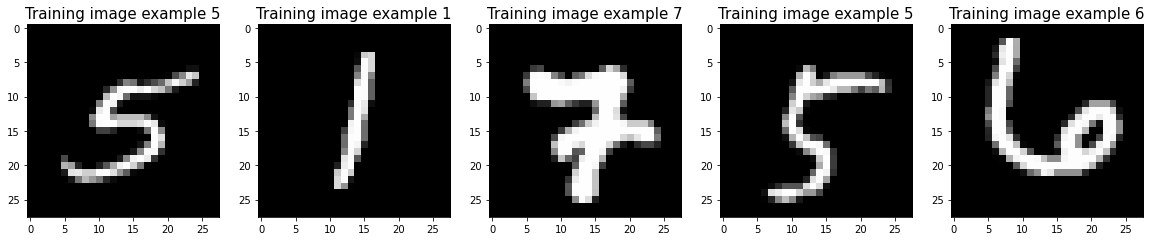

In [6]:
plt.figure(figsize=(20,4))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(X_train[i,:],(28,28)),cmap='gray')
    plt.title('Training image example %i' %int(y_train[i]), fontsize=15)

### Conventional KNN algorithm over whole data with K=1


In [7]:
t0 = time.time()
knn_base = KNeighborsClassifier(n_neighbors=1)
knn_base.fit(X_train,y_train)
y_predict = knn_base.predict(X_test)
run_time = time.time() - t0
print("Algorithm runs in %.3f s" % run_time)

Algorithm runs in 17.315 s


In [8]:
print("Accuracy of convential 1-NN calssifier: ",metrics.accuracy_score(y_predict,y_test))

Accuracy of convential 1-NN calssifier:  0.9734


## 2. Choosing 'prototypes' method
-In this part, we will compare the uniformly random choice on training data and choice on prototype. We will be using K-means clustering to find the centroid of each label in terms of choosing prototype. From there, we can choose more eligeble data point to train data.

### 2.1 The function randomly (uniformly) choose 'M' samples from the training set.

In [9]:
def rand_prototype(M):
    indices = np.random.choice(len(y_train), M, replace=False)
    return X_train[indices,:], y_train[indices]
# sampleX, sampleY = rand_prototype(1000)

## 3. Comparing the 2 methods (Conventional NN VS Prototyped NN)

In [ ]:
t0 = time.time()

run_time = time.time() - t0
print("Algorithm runs in %.3f s" % run_time)